# 6614 DIB

In this Notebook, we take the best spherical fit for the 6614 DIB, and starting from those values, we go a little prolate/oblate to see how the profile changes. There may be a better fit changing the parameters a little bit towards those symmetries. 
However, we don't see a smooth transition when changing the symmetry, instead, we observe major changes in the profile.

# From best spherical fit to near prolate/oblate tops

In [35]:
# import statements
from edibles.utils.simulations.SimulatedContour import Simulated_Contour
from edibles.utils.simulations.RotationalEnergies import WavelengthToWavenumber
from edibles.utils.simulations.AverageSpectrum import CreateAverageSpectrum
from edibles.utils.simulations.RotationalEnergies import Rotational_Energies

# import functions for plotting and animations
from edibles.utils.simulations.SimulatedContourParameterSurvey import one_variable_survey

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
from IPython import display
import matplotlib.pyplot as plt

## Best fit

In [36]:
# Working DIB
dib = 6614
sightline = 'HD 170740'

# Best fit 
B = 0.044154902188046595
T = 6.000091214719852
delta = 0.03203558049423842
Q_scale = 0.6357856474520915
PR_scale = 1.2273324136673365
Y_Scale = 0.00557674919450446
lambda0 = 6613.284834352651

# Get observational data
obs = CreateAverageSpectrum(dib, sightline, verbose=False)

# Perform simulation
sim = Simulated_Contour(A=B, B=B, C=B, Delta_A=delta*B, Delta_B=delta*B, Delta_C=delta*B,
            Trot=T, Jlimit=100, Target=sightline, lambda0=lambda0,
            Q_Branch=True, Q_scale=Q_scale, PR_scale=PR_scale)

C:/Users/missa/Documents/Proyectos/mitacs/data
***Common Objects***
['HD 170740']
**Filtered File List**
5826    /HD170740/RED_564/HD170740_w564_n10_20170701_U...
5926    /HD170740/RED_564/HD170740_w564_n24_20140916_U...
5936    /HD170740/RED_564/HD170740_w564_n2_20160505_U....
5975    /HD170740/RED_564/HD170740_w564_n24_20150424_U...
6004    /HD170740/RED_564/HD170740_w564_n9_20160612_U....
Name: Filename, dtype: object
5
Symmetry Type:  spherical
Symmetry Type:  spherical


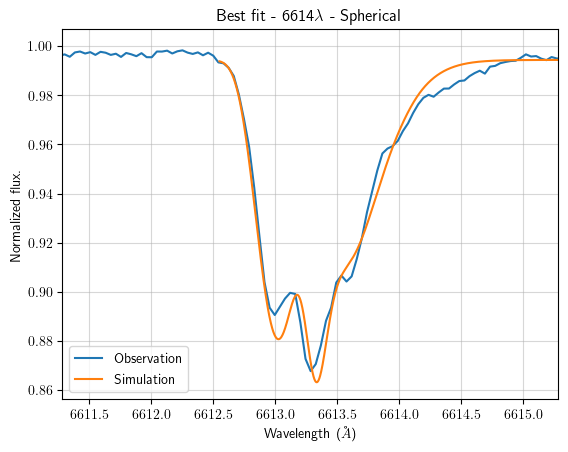

In [38]:
def comparison(obs, sim):
    plt.plot(obs[0], obs[1], label = 'Observation')
    plt.plot(sim[0], sim[1]*(1-Y_Scale), label = 'Simulation')
    plt.xlim(lambda0-2, lambda0+2)
    plt.legend()
    plt.grid(alpha = 0.5)
    plt.title('Best fit - 6614$\lambda$ - Spherical')
    plt.ylabel('Normalized flux.')
    plt.xlabel('Wavelength ($\AA$)')
    plt.show()
    
comparison(obs, sim)

## Best fit but with delta = 0

Symmetry Type:  spherical
Symmetry Type:  spherical


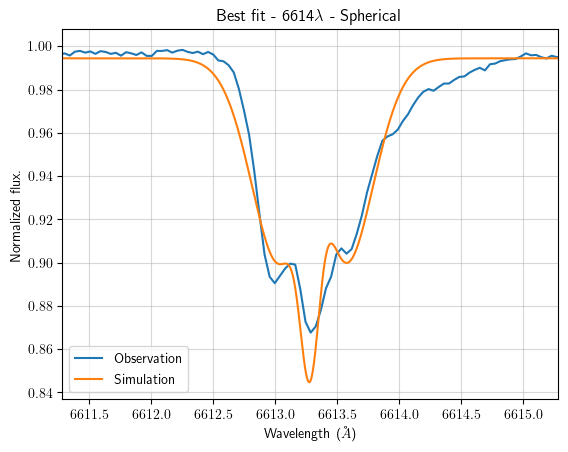

In [39]:
delta = 0.0

# Perform simulation
sim = Simulated_Contour(A=B, B=B, C=B, Delta_A=delta*B, Delta_B=delta*B, Delta_C=delta*B,
            Trot=T, Jlimit=100, Target=sightline, lambda0=lambda0,
            Q_Branch=True, Q_scale=Q_scale, PR_scale=PR_scale)

comparison(obs, sim)

# Going prolate by 1%

Symmetry Type:  symmetric_prolate
Symmetry Type:  symmetric_prolate


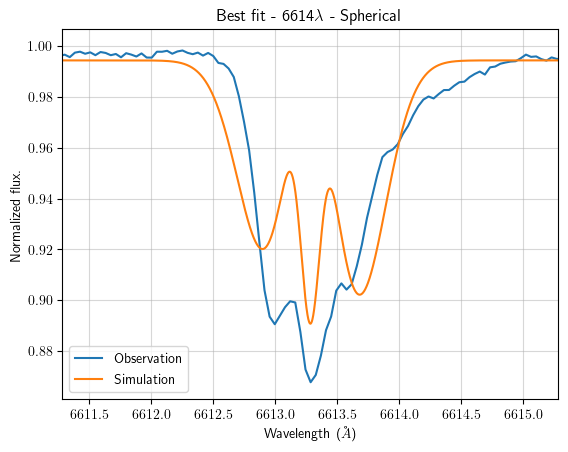

In [41]:
# Perform simulation
A = 0.044154902188046595
B = 0.044154902188046595*0.99

sim = Simulated_Contour(A=A, B=B, C=B, Delta_A=delta*A, Delta_B=delta*B, Delta_C=delta*B,
            Trot=T, Jlimit=100, Target=sightline, lambda0=lambda0,
            Q_Branch=True, Q_scale=Q_scale, PR_scale=PR_scale)

comparison(obs, sim)

# Going prolate by 0.01%

Same effect if we change only a bit

Symmetry Type:  symmetric_prolate
Symmetry Type:  symmetric_prolate


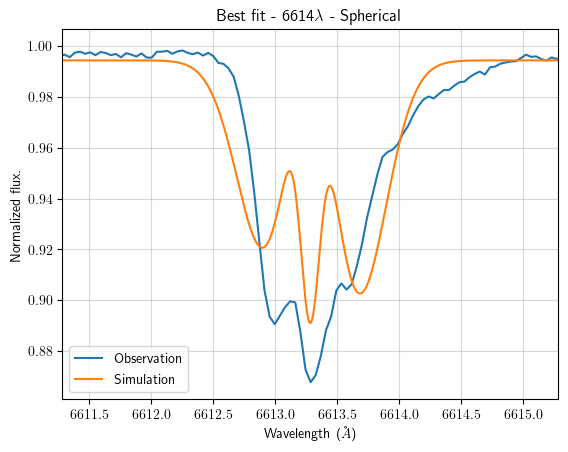

In [42]:
# Perform simulation
A = 0.044154902188046595
B = 0.044154902188046595*0.9999

sim = Simulated_Contour(A=A, B=B, C=B, Delta_A=delta*A, Delta_B=delta*B, Delta_C=delta*B,
            Trot=T, Jlimit=100, Target=sightline, lambda0=lambda0,
            Q_Branch=True, Q_scale=Q_scale, PR_scale=PR_scale)

comparison(obs, sim)

## Going oblate by 1%

Symmetry Type:  symmetric_oblate
Symmetry Type:  symmetric_oblate


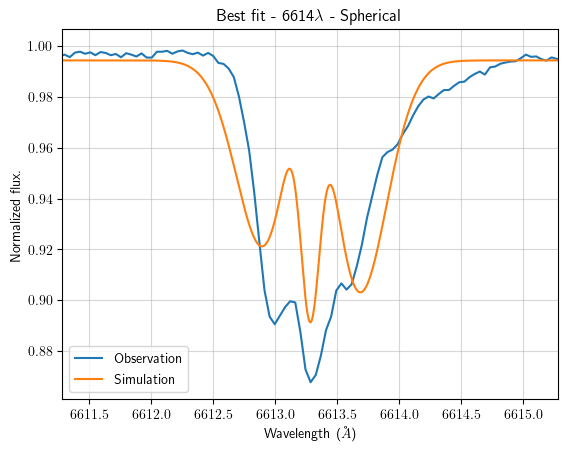

In [43]:
# Perform simulation
C = 0.044154902188046595
B = 0.044154902188046595*1.01

sim = Simulated_Contour(A=B, B=B, C=C, Delta_A=delta*B, Delta_B=delta*B, Delta_C=delta*C,
            Trot=T, Jlimit=100, Target=sightline, lambda0=lambda0,
            Q_Branch=True, Q_scale=Q_scale, PR_scale=PR_scale)

comparison(obs, sim)

# Looking at transitions

Here, we look at individual transitions to see if those remarkable differences because of changing the symmetry (and not so much the paramter values) also happens in individual transitions.

In [44]:
def Simulated_transitions(A, Delta_A, B, Delta_B, C, Delta_C, Trot, Jlimit, Target, Q_scale=1,
                      PR_scale=1, Q_Branch=False, lambda0=0, xlim=(-5,5), transition_type='Parallel'):
    """Generate simulated contour.

    Args:
        A (float): Rotational constant of the first rotational axis.
        Delta_A (float): Difference between the values of the first rotational constant of the 
            upper and lower states.
        B (float): Constant of the second axis.
        Delta_B (float): Difference of the second constant.
        C (float): Constant of the third axis.
        Delta_C (float): Difference of the third constant.
        Trot (float): Temperature (Kelvin degrees).
        Jlimit (int): Upper bound of the first rotational quantum number J.
        Target (str): Name of the target sightline.
        Q_scale (float, optional): Scale of the Q-branch. Default to 1.
        PR_scale (float, optional): Scale of the P-branch and R-branch. Default to 1.
        Q_Branch (bool, optional): Wheter to consideror not the Q-branch. Default to False.
        lambda0 (float, optional): Center wavelength of DIB (Angstrom). Default to 0.

    Returns:
        re_low.spectrax (1darray): Resulting spectrum.
        re_low.final_y (1darray): Intensity of spectrum.
    """
    # Generate class object.
    re_low = Rotational_Energies(A=A, B=B, C=C, Target=Target,
                                 Q_scale=Q_scale, PR_scale=PR_scale, transition_type=transition_type)

    # Check for available symmetries.
    if re_low.flag:
        print("Can't deal with this molecule yet")
        return([0], [0])
    else:
        # Get rotational energies.
        re_low.rotational_energies(Jlimit=Jlimit)

        # Get energies populations.
        re_low.boltzmann(T=Trot)

        # Define new class to transitionate.
        re_up = Rotational_Energies(A=A+Delta_A, B=B+Delta_B, C=C+Delta_C,
                                    Target=Target, Q_scale=Q_scale, PR_scale=PR_scale,
                                    transition_type=transition_type)

        # Get rotational energies of new class
        re_up.rotational_energies(Jlimit=Jlimit)

        # Get allowed combinations between the two clases (ie states).
        re_low.allowed_combinations(Jup=re_up.J, Kup=re_up.K,
                                    Eup=re_up.E, Q_Branch=Q_Branch)

        # Get transition frequencies and populations.
        re_low.transition_freq_and_pop()

        # Plot Transitions
        plt.figure("Transitions")
        re_low.plot_transitions()
        plt.xlim(xlim)
        plt.legend()
        
        plt.show()

## With original delta value

Symmetry Type:  spherical
Symmetry Type:  spherical


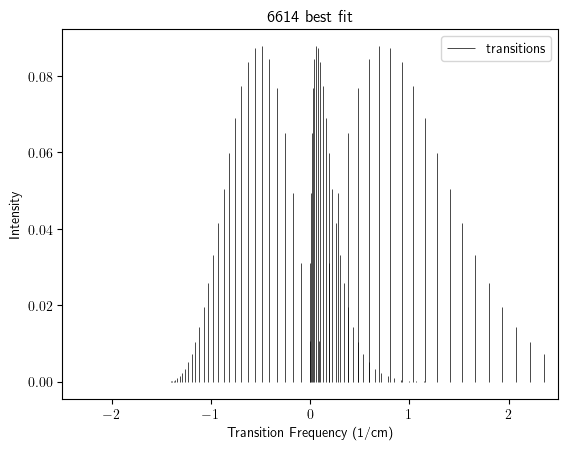

In [45]:
# Best fit 
B = 0.044154902188046595
T = 6.000091214719852
delta = 0.03203558049423842
lambda0 = 6613.284834352651

sim = Simulated_transitions(A=B, B=B, C=B, Delta_A=B*delta, Delta_B=B*delta, Delta_C=B*delta, Trot=T,
                        Jlimit=200, Target='6614 best fit', lambda0=6614, Q_Branch=True, xlim=(-2.5, 2.5))

With PGOPHER we obtain:

<img src="https://i.imgur.com/M7jBb53.jpg" alt="Drawing" style="width: 600px;"/>

## Going prolate

Symmetry Type:  symmetric_prolate
Symmetry Type:  symmetric_prolate


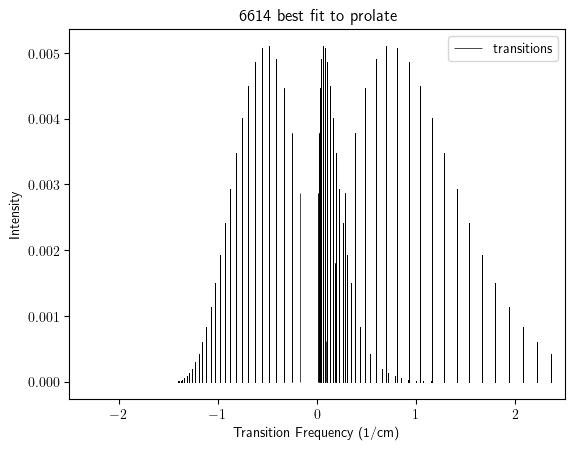

In [46]:
# Best fit 
A = 0.044154902188046595*1.00001  #0.001%
B = 0.044154902188046595
T = 6.000091214719852
delta = 0.03203558049423842
lambda0 = 6613.284834352651
Q_branch = True

sim = Simulated_transitions(A=A, B=B, C=B, Delta_A=A*delta, Delta_B=B*delta, Delta_C=B*delta, Trot=T,
                        Jlimit=100, Target='6614 best fit to prolate', lambda0=6614, Q_Branch=Q_branch, xlim = (-2.5, 2.5))

With PGOPHER we obtain:

<img src="https://i.imgur.com/WLBz3el.jpg" alt="Drawing" style="width: 600px;"/>

Symmetry Type:  symmetric_prolate
Symmetry Type:  symmetric_prolate


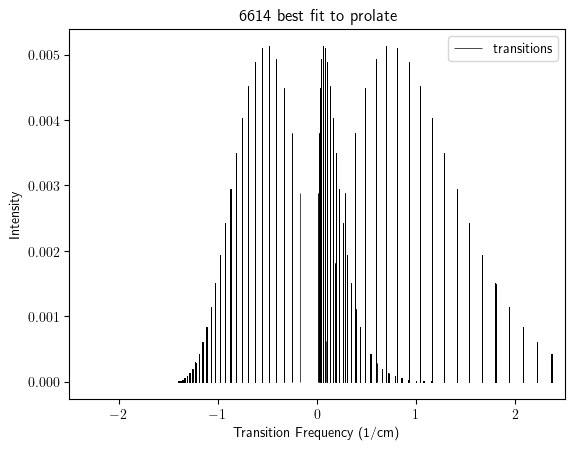

In [47]:
# Best fit 
A = 0.044154902188046595*1.01  # 1%
B = 0.044154902188046595
T = 6.000091214719852
delta = 0.03203558049423842
lambda0 = 6613.284834352651

sim = Simulated_transitions(A=A, B=B, C=B, Delta_A=A*delta, Delta_B=B*delta, Delta_C=B*delta, Trot=T,
                        Jlimit=100, Target='6614 best fit to prolate', lambda0=6614, Q_Branch=Q_branch, xlim = (-2.5, 2.5))

With PGOPHER we obtain:

<img src="https://i.imgur.com/qS8Achs.jpg" alt="Drawing" style="width: 600px;"/>

Symmetry Type:  symmetric_prolate
Symmetry Type:  symmetric_prolate


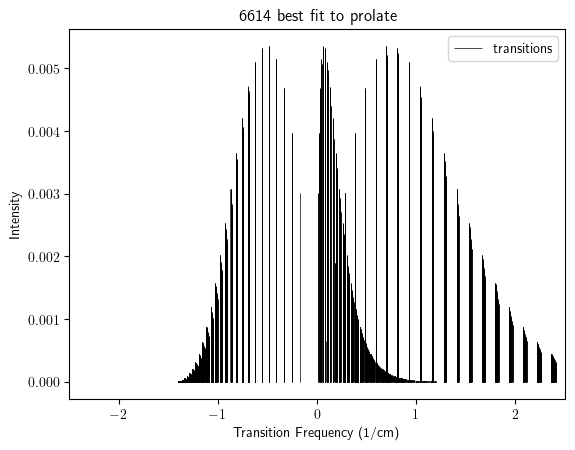

In [49]:
# Best fit 
A = 0.044154902188046595*1.1 # 10%
B = 0.044154902188046595
T = 6.000091214719852
delta = 0.03203558049423842
lambda0 = 6613.284834352651

sim = Simulated_transitions(A=A, B=B, C=B, Delta_A=A*delta, Delta_B=B*delta, Delta_C=B*delta, Trot=T,
                        Jlimit=100, Target='6614 best fit to prolate', lambda0=6614, Q_Branch=Q_branch, xlim = (-2.5, 2.5))

With PGOPHER we obtain:

<img src="https://i.imgur.com/AWBIIIn.jpg" alt="Drawing" style="width: 600px;"/>

## With delta = 0

With delta = 0, we can't see the several transitions that are in the same positions.

Symmetry Type:  spherical
Symmetry Type:  spherical


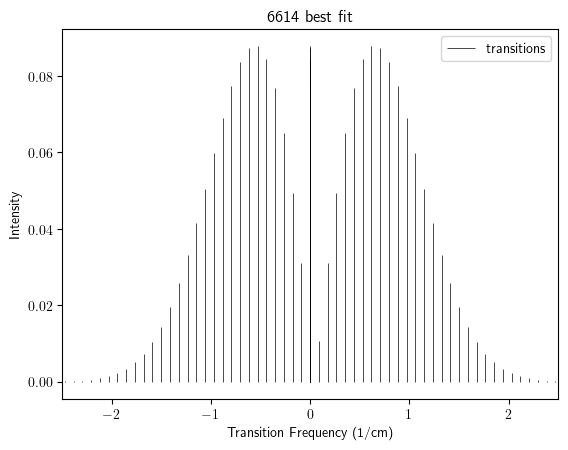

In [62]:
# Best fit 
B = 0.044154902188046595
T = 6.000091214719852
delta = 0.0
lambda0 = 6613.284834352651

sim = Simulated_transitions(A=B, B=B, C=B, Delta_A=B*delta, Delta_B=B*delta, Delta_C=B*delta, Trot=T,
                        Jlimit=200, Target='6614 best fit', lambda0=6614, Q_Branch=True, xlim=(-2.5, 2.5))

With PGOPHER we obtain:

<img src="https://i.imgur.com/PIHYQkA.jpg" alt="Drawing" style="width: 600px;"/>

Symmetry Type:  symmetric_prolate
Symmetry Type:  symmetric_prolate


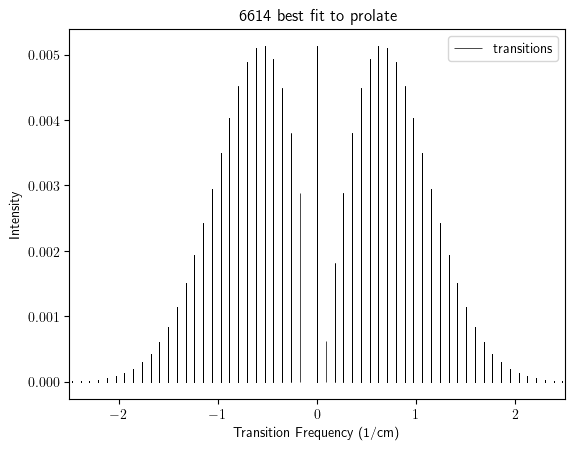

In [63]:
# Best fit 
A = 0.044154902188046595*1.01  # 1%
B = 0.044154902188046595
T = 6.000091214719852
delta = 0.0
lambda0 = 6613.284834352651

sim = Simulated_transitions(A=A, B=B, C=B, Delta_A=A*delta, Delta_B=B*delta, Delta_C=B*delta, Trot=T,
                        Jlimit=100, Target='6614 best fit to prolate', lambda0=6614, Q_Branch=Q_branch, xlim = (-2.5, 2.5))

With PGOPHER we obtain:

<img src="https://i.imgur.com/A8urKvE.jpg" alt="Drawing" style="width: 600px;"/>